In [55]:
import bs4 as bs
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import os
import pandas as pd
import pandas_datareader.data as web
import pickle
import requests
from collections import Counter
from sklearn import svm, neighbors
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

In [56]:
def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    main_df = pd.DataFrame()

    for count, ticker in enumerate(tickers):
        try:
            df = pd.read_csv('CryptoCurrencys/{}.csv'.format(ticker))
            df.set_index('Date', inplace=True)
            df.rename(columns={'Adj Close': ticker}, inplace=True)
            df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

        except:
            print('There is no data for {}'.format(ticker))
                    
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer',lsuffix='_left')
        if count % 10 == 0:
            print(count)
    
    main_df.drop(axis=1, columns=['NXT-USD_left','GRC-USD_left','NEO-USD_left','XMR-USD_left','ZEC-USD_left'],inplace=True)
    print(main_df.tail())
    main_df.to_csv('sp500_joined_closes.csv')


compile_data()

0
There is no data for XPM-USD
There is no data for AUR-USD
10
There is no data for MZC-USD
There is no data for TIT-USD
20
There is no data for BCH[56]-USD
30
                 BTC-USD     LTC-USD   NMC-USD   PPC-USD  DOGE-USD   GRC-USD  \
Date                                                                           
2021-05-02  56631.078125  269.104370  2.238225  1.189598  0.376046  0.011374   
2021-05-03  57200.292969  294.704010  2.360893  1.155767  0.441707  0.010049   
2021-05-04  53333.539062  306.234497  2.165581  1.024301  0.541334  0.010327   
2021-05-05  57424.007812  356.037079  2.086508  1.150907  0.657633  0.011595   
2021-05-06  57163.667969  343.414642  2.245852  1.119516  0.608795  0.011785   

             XRP-USD   NXT-USD    DASH-USD     NEO-USD  ...   TRX-USD  \
Date                                                    ...             
2021-05-02  1.562641  0.081778  315.036316  106.497284  ...  0.127653   
2021-05-03  1.555995  0.077486  342.016449  107.084518  ... 

In [57]:
df=pd.read_csv('sp500_joined_closes.csv',parse_dates=['Date'])
df.tail()

,Date,BTC-USD,LTC-USD,NMC-USD,PPC-USD,DOGE-USD,GRC-USD,XRP-USD,NXT-USD,DASH-USD,...,TRX-USD,DOT1-USD,BCH-USD,UNI3-USD,LINK-USD,USDC-USD,VET-USD,BNB-USD,BSV-USD,LUNA1-USD
2418,2021-05-02,56631.078125,269.104370,2.238225,1.189598,0.376046,0.011374,1.562641,0.081778,315.036316,...,0.127653,36.654530,974.655457,42.327312,39.504856,0.999949,0.216028,622.101013,332.259888,17.145102
2419,2021-05-03,57200.292969,294.704010,2.360893,1.155767,0.441707,0.010049,1.555995,0.077486,342.016449,...,0.131614,37.255207,1017.299988,42.317528,42.059807,1.000104,0.210779,675.684082,369.906860,17.284819
2420,2021-05-04,53333.539062,306.234497,2.165581,1.024301,0.541334,0.010327,1.392376,0.067424,361.725464,...,0.119394,34.853508,955.182434,43.164505,45.686138,1.000195,0.188579,611.200317,327.222260,16.337412
2421,2021-05-05,57424.007812,356.037079,2.086508,1.150907,0.657633,0.011595,1.614512,0.070537,395.667206,...,0.146353,40.495045,1454.935059,42.496189,49.429295,1.000118,0.207319,651.662720,423.407715,17.017754
2422,2021-05-06,57163.667969,343.414642,2.245852,1.119516,0.608795,0.011785,1.688038,0.072908,409.795441,...,0.151055,40.428532,1415.871704,41.735302,47.818073,0.999803,0.218892,640.913391,417.475098,16.779179


In [58]:
len(df)

2423

In [59]:
df.corr().tail()

,BTC-USD,LTC-USD,NMC-USD,PPC-USD,DOGE-USD,GRC-USD,XRP-USD,NXT-USD,DASH-USD,NEO-USD,...,TRX-USD,DOT1-USD,BCH-USD,UNI3-USD,LINK-USD,USDC-USD,VET-USD,BNB-USD,BSV-USD,LUNA1-USD
USDC-USD,-0.301965,-0.291551,-0.081345,0.235688,-0.126276,-0.127365,-0.050763,0.119474,-0.130192,-0.203731,...,-0.153742,0.010794,-0.246690,-0.197225,-0.316305,1.000000,-0.179071,-0.190438,-0.252322,-0.117036
VET-USD,0.805428,0.822337,0.670085,0.349239,0.894140,0.440515,0.869228,0.478145,0.744348,0.968883,...,0.939510,0.764826,0.744251,0.583530,0.816109,-0.179071,1.000000,0.960869,0.506650,0.860562
BNB-USD,0.846588,0.572200,0.162867,-0.078556,0.852207,-0.087764,0.384591,-0.054624,0.033929,0.305496,...,0.659183,0.861332,0.080975,0.841782,0.827439,-0.190438,0.960869,1.000000,0.489550,0.908838
BSV-USD,0.525283,0.526831,0.345380,-0.008453,0.446102,0.288920,0.402197,0.146240,0.512395,0.555783,...,0.479123,0.682982,0.678354,0.659895,0.571885,-0.252322,0.506650,0.489550,1.000000,0.399574
LUNA1-USD,0.874418,0.853061,0.872557,0.840564,0.679593,0.624018,0.761537,0.912339,0.872900,0.854815,...,0.866107,0.896395,0.788860,0.111009,0.813705,-0.117036,0.860562,0.908838,0.399574,1.000000


           BTC-USD   LTC-USD   NMC-USD   PPC-USD  DOGE-USD   GRC-USD  \
BTC-USD   1.000000  0.771332  0.308165  0.083770  0.606006  0.098839   
LTC-USD   0.771332  1.000000  0.691918  0.569971  0.471968  0.562430   
NMC-USD   0.308165  0.691918  1.000000  0.935096  0.221285  0.902927   
PPC-USD   0.083770  0.569971  0.935096  1.000000  0.041280  0.951182   
DOGE-USD  0.606006  0.471968  0.221285  0.041280  1.000000  0.022163   

           XRP-USD   NXT-USD  DASH-USD   NEO-USD  ...   TRX-USD  DOT1-USD  \
BTC-USD   0.537487  0.135134  0.325878  0.386558  ...  0.581117  0.961665   
LTC-USD   0.850841  0.569989  0.783262  0.797435  ...  0.756828  0.914060   
NMC-USD   0.749114  0.729675  0.871540  0.754863  ...  0.588355  0.909006   
PPC-USD   0.687312  0.779265  0.887829  0.745481  ...  0.453858  0.814966   
DOGE-USD  0.408485  0.040177  0.152509  0.353714  ...  0.586356  0.581425   

           BCH-USD  UNI3-USD  LINK-USD  USDC-USD   VET-USD   BNB-USD  \
BTC-USD   0.145215 -0.098189  0.

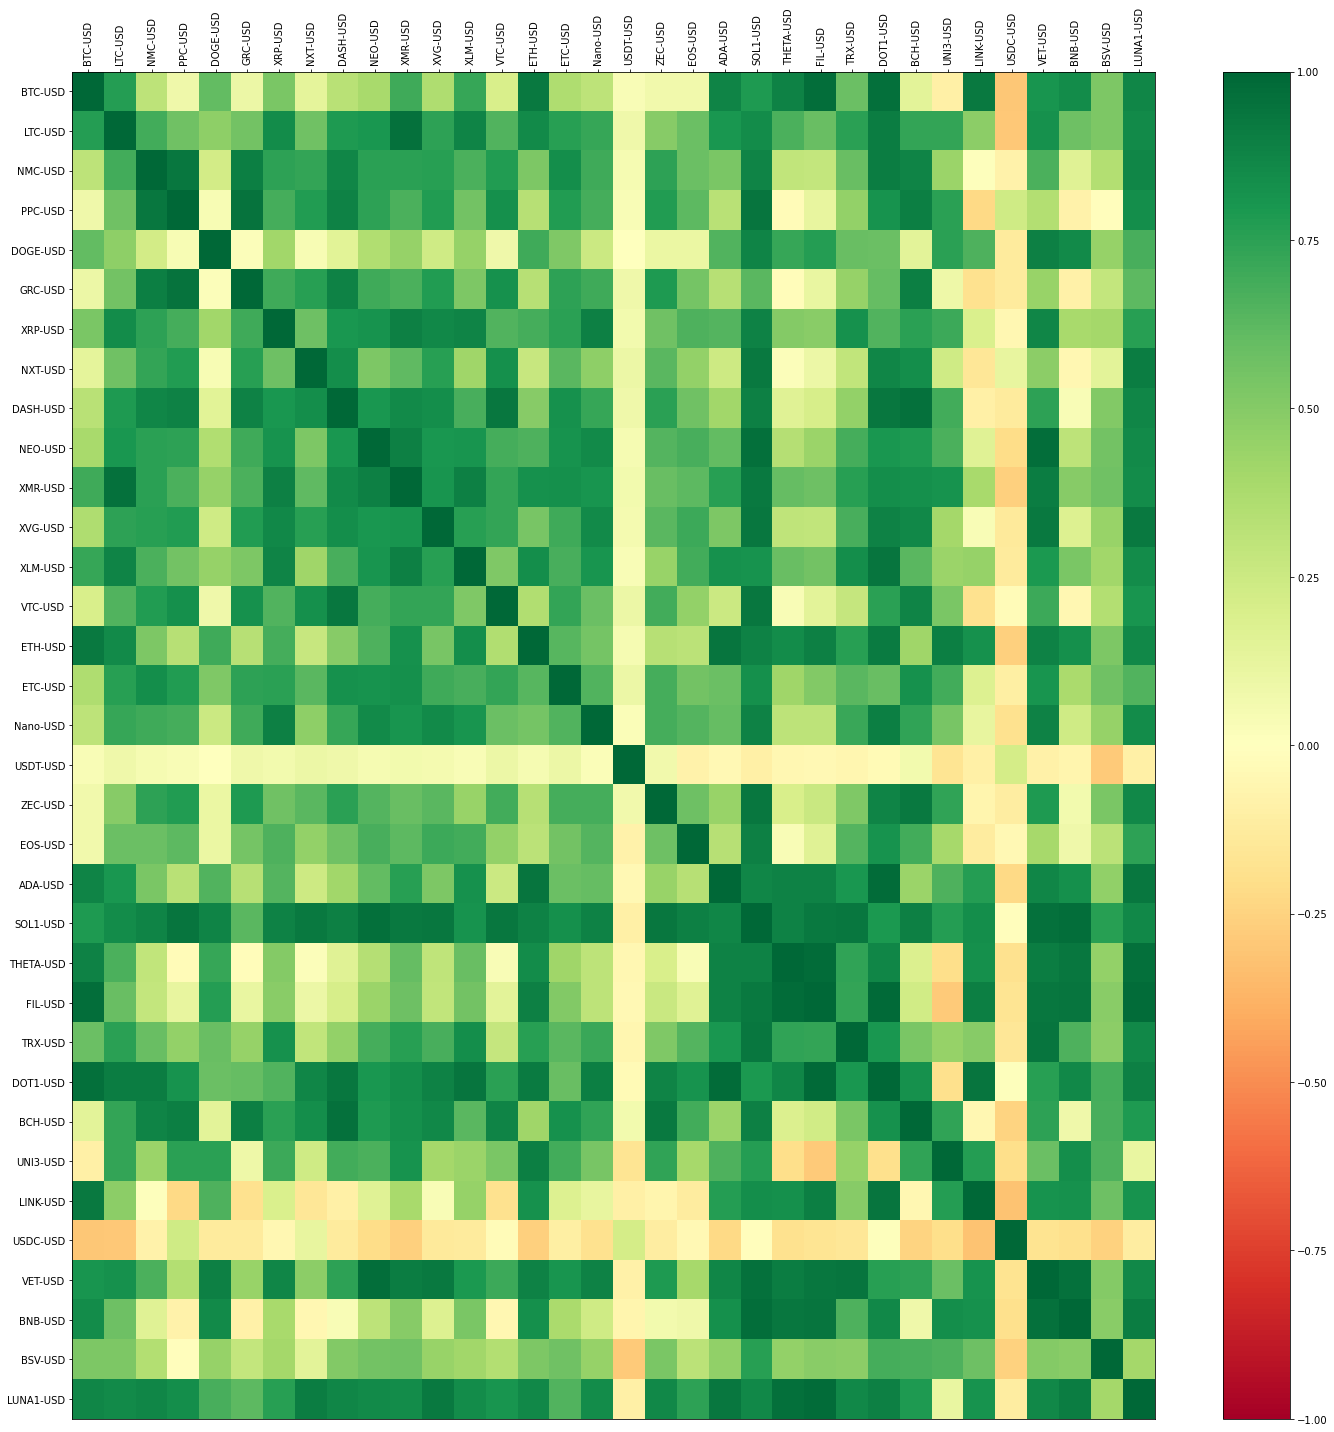

In [60]:
def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')
    df_corr = df.corr()
    print(df_corr.head())
    df_corr.to_csv('sp500corr.csv')
    data1 = df_corr.values
    fig1 = plt.figure(figsize=(20,20))
    ax1 = fig1.add_subplot(111)

    heatmap1 = ax1.pcolor(data1, cmap=plt.cm.RdYlGn)
    fig1.colorbar(heatmap1)

    ax1.set_xticks(np.arange(data1.shape[1]) + 0.5, minor=False)
    ax1.set_yticks(np.arange(data1.shape[0]) + 0.5, minor=False)
    ax1.invert_yaxis()
    ax1.xaxis.tick_top()
    column_labels = df_corr.columns
    row_labels = df_corr.index
    ax1.set_xticklabels(column_labels)
    ax1.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap1.set_clim(-1, 1)
    plt.tight_layout()
    plt.show()


visualize_data()

In [61]:
def process_data_for_labels(ticker):
    hm_days = 7
    df = pd.read_csv('sp500_joined_closes.csv', index_col=0)
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace=True)

    for i in range(1,hm_days+1):
        df['{}_{}d'.format(ticker,i)] = (df[ticker].shift(-i) - df[ticker]) / df[ticker]

    df.fillna(0, inplace=True)
    return tickers, df

def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.02
    for col in cols:
        if col > requirement:
            return 1
        if col < -requirement:
            return -1
    return 0



In [62]:
from collections import Counter
def extract_featuresets(ticker):
    tickers, df = process_data_for_labels(ticker)

    df['{}_target'.format(ticker)] = list(map( buy_sell_hold,
                                               df['{}_1d'.format(ticker)],
                                               df['{}_2d'.format(ticker)],
                                               df['{}_3d'.format(ticker)],
                                               df['{}_4d'.format(ticker)],
                                               df['{}_5d'.format(ticker)],
                                               df['{}_6d'.format(ticker)],
                                               df['{}_7d'.format(ticker)] ))
    
    
    vals = df['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data spread:', Counter(str_vals))

    df.bfill(axis=0, inplace=True)
    df = df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)

    df_vals = df[[ticker for ticker in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.bfill(axis=0, inplace=True)

    X = df_vals.values
    y = df['{}_target'.format(ticker)].values
    return X, y, df


In [63]:
def do_ml(ticker):
    X, y, df = extract_featuresets(ticker)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    clf = VotingClassifier([('lsvc', svm.LinearSVC()),
                            ('knn', neighbors.KNeighborsClassifier()),
                            ('rfor', RandomForestClassifier())])

    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('accuracy:', confidence)
    predictions = clf.predict(X_test)
    print('predicted class counts:', Counter(predictions))
    print()
    print()
    return confidence


# examples of running:
do_ml('BTC-USD')
do_ml('ADA-USD')
do_ml('ETH-USD')

Data spread: Counter({'1': 1291, '-1': 971, '0': 161})
accuracy: 0.5388429752066116
predicted class counts: Counter({1: 488, -1: 117})


Data spread: Counter({'0': 1107, '-1': 675, '1': 641})
accuracy: 0.6423841059602649
predicted class counts: Counter({0: 356, -1: 175, 1: 73})


Data spread: Counter({'1': 1092, '-1': 1000, '0': 331})
accuracy: 0.5198675496688742
predicted class counts: Counter({-1: 298, 1: 269, 0: 37})




0.5198675496688742

In [64]:
from statistics import mean

with open("sp500tickers.pickle","rb") as f:
    tickers = pickle.load(f)

accuracies = []
for count,ticker in enumerate(tickers):

    if count%10==0:
        print(count)
    try:
        accuracy = do_ml(ticker)
        accuracies.append(accuracy)
        print("{} accuracy: {}. Average accuracy:{}".format(ticker,accuracy,mean(accuracies)))
    except:
        print('Oops! {} is not found'.format(ticker))
        
#1 buy
#-1 sell
#0 hold

0
Data spread: Counter({'1': 1291, '-1': 971, '0': 161})
accuracy: 0.5239669421487604
predicted class counts: Counter({1: 461, -1: 144})


BTC-USD accuracy: 0.5239669421487604. Average accuracy:0.5239669421487604
Data spread: Counter({'1': 1188, '-1': 1121, '0': 114})
accuracy: 0.4727272727272727
predicted class counts: Counter({1: 367, -1: 238})


LTC-USD accuracy: 0.4727272727272727. Average accuracy:0.4983471074380166
Data spread: Counter({'-1': 1231, '1': 1171, '0': 21})
accuracy: 0.5388429752066116
predicted class counts: Counter({-1: 344, 1: 261})


NMC-USD accuracy: 0.5388429752066116. Average accuracy:0.5118457300275483
Data spread: Counter({'-1': 1289, '1': 1124, '0': 10})
accuracy: 0.5454545454545454
predicted class counts: Counter({-1: 416, 1: 189})


PPC-USD accuracy: 0.5454545454545454. Average accuracy:0.5202479338842976
Data spread: Counter({'-1': 1230, '1': 1099, '0': 94})
accuracy: 0.4743801652892562
predicted class counts: Counter({-1: 430, 1: 175})


DOGE-USD accurac

In [65]:
df = pd.read_csv('CryptoCurrencys/Nano-USD.csv',parse_dates=['Date'],index_col=0)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-07,0.009104,0.007643,0.009104,0.008675,23600.0,0.008675
2017-03-08,0.009798,0.007782,0.008672,0.009707,26158.0,0.009707
2017-03-09,0.009998,0.006985,0.008916,0.008343,27587.0,0.008343
2017-03-10,0.008461,0.006658,0.008349,0.007292,27405.0,0.007292
2017-03-11,0.008130,0.007228,0.007290,0.007530,7099.0,0.007530


<AxesSubplot:xlabel='Date'>

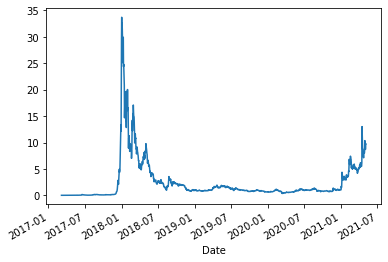

In [66]:
df['Adj Close'].plot()

In [67]:
df['25ma'] = df['Adj Close'].rolling(window = 25,min_periods = 0).mean()
df.head()

,High,Low,Open,Close,Volume,Adj Close,25ma
Date,,,,,,,
2017-03-07,0.009104,0.007643,0.009104,0.008675,23600.0,0.008675,0.008675
2017-03-08,0.009798,0.007782,0.008672,0.009707,26158.0,0.009707,0.009191
2017-03-09,0.009998,0.006985,0.008916,0.008343,27587.0,0.008343,0.008908
2017-03-10,0.008461,0.006658,0.008349,0.007292,27405.0,0.007292,0.008504
2017-03-11,0.008130,0.007228,0.007290,0.007530,7099.0,0.007530,0.008309


<AxesSubplot:xlabel='Date'>

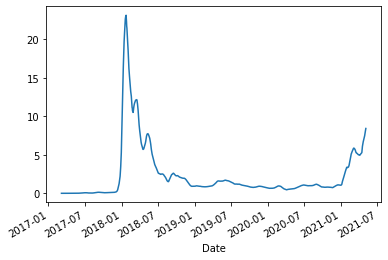

In [68]:
df['25ma'].plot()